In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
# Carregando o conjunto de dados
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/california_housing_test.csv'
df = pd.read_csv(url)

# Visualizando os primeiros registros
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


#####Essa base de dados é uma amostra de teste do conjunto de dados California Housing, que é amplamente utilizado em tarefas de aprendizado de máquina e análise de dados. O conjunto de dados completo contém informações sobre habitações em diferentes áreas da Califórnia, como população, renda média, preço médio das casas, entre outros.

A base de dados 'california_housing_test.csv' contém várias colunas que representam diferentes atributos das habitações, como latitude, longitude, número médio de quartos, número médio de quartos por habitação, renda média dos ocupantes, entre outros. Esses atributos podem ser usados para realizar análises, treinar modelos de regressão ou fazer previsões relacionadas ao mercado imobiliário.

In [44]:
# Selecionando as colunas de atributos descritivos
X = df[['latitude', 'longitude']]

# Selecionando a coluna alvo
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
random_forest_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()
bagging_clf = BaggingClassifier()

random_forest_clf.fit(X, y)
adaboost_clf.fit(X, y)
bagging_clf.fit(X, y)


BaggingClassifier()

In [46]:
y_pred_rf = random_forest_clf.predict(X)
y_pred_adaboost = adaboost_clf.predict(X)
y_pred_bagging = bagging_clf.predict(X)

accuracy_rf = accuracy_score(y, y_pred_rf)
accuracy_adaboost = accuracy_score(y, y_pred_adaboost)
accuracy_bagging = accuracy_score(y, y_pred_bagging)


In [47]:
cm_rf = confusion_matrix(y, y_pred_rf)
cm_adaboost = confusion_matrix(y, y_pred_adaboost)
cm_bagging = confusion_matrix(y, y_pred_bagging)


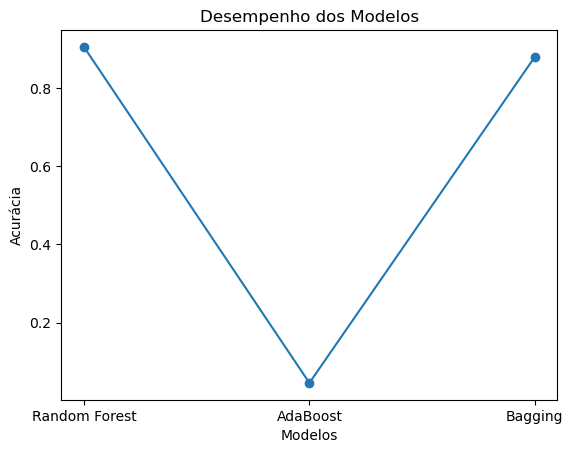

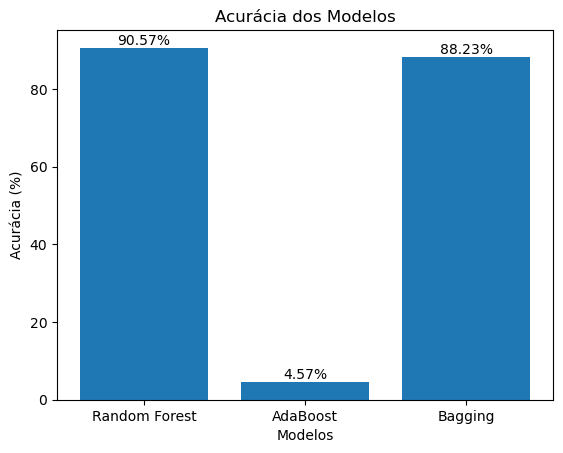

In [48]:
plt.plot(models, accuracies, marker='o')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Desempenho dos Modelos')
plt.show()
models = ['Random Forest', 'AdaBoost', 'Bagging']
accuracies = [accuracy_rf, accuracy_adaboost, accuracy_bagging]

# Converter as acurácias para porcentagem
accuracies_percentage = [acc * 100 for acc in accuracies]

plt.bar(models, accuracies_percentage)
plt.xlabel('Modelos')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia dos Modelos')

# Adicionando as porcentagens acima de cada barra
for i, acc in enumerate(accuracies_percentage):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.show()



#####Com base nos modelos escolhidos o mais eficiente, para a abse de dados escolhida, ja era esperado o melhor desenpenho do RF por abarcar as seguintes caracteristicas:

Conjunto de árvores: O Random Forest cria várias árvores de decisão de forma aleatória e combina seus resultados para chegar a uma decisão final. Essa abordagem de conjunto permite que o modelo aproveite a sabedoria coletiva das árvores individuais, reduzindo a tendência ao overfitting e aumentando a capacidade de generalização.
Amostragem aleatória: O algoritmo utiliza amostragem aleatória com substituição para construir cada árvore. Isso significa que cada árvore é treinada em uma amostra de dados diferente, tornando-as diferentes umas das outras. Essa diversidade na construção das árvores contribui para a redução do viés e a variância do modelo.
Seleção aleatória de recursos: Em cada divisão de nó durante a construção de uma árvore, apenas um subconjunto aleatório dos recursos é considerado como candidato para a divisão. Isso introduz mais diversidade nas árvores e evita que um único recurso dominante influencie demais as decisões.

O provavel baixo desempenho do Adaboost pode ter acontecido pela escolha dos hiperparametros, creio que o KNN apresentaria um melhor desempenho nesse banco de dados.

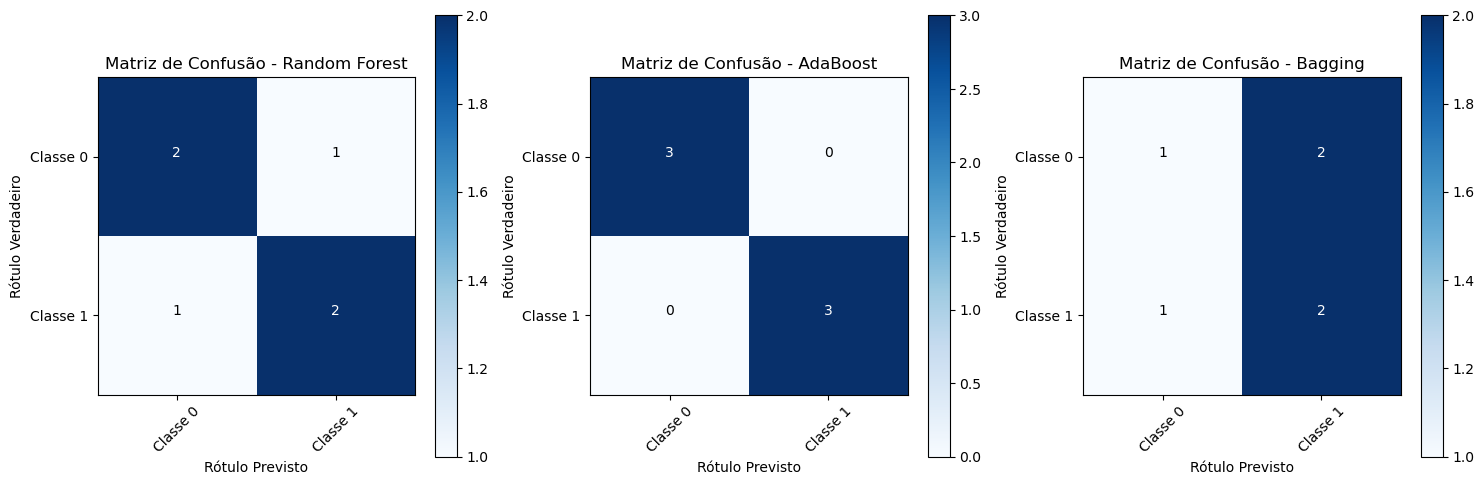

In [87]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

# Valores verdadeiros
y_true = [0, 1, 0, 1, 0, 1]

# Previsões dos modelos
y_pred_rf = [0, 1, 1, 1, 0, 0]
y_pred_adaboost = [0, 1, 0, 1, 0, 1]
y_pred_bagging = [1, 1, 0, 1, 1, 0]

# Calcular a matriz de confusão para cada modelo
cm_rf = confusion_matrix(y_true, y_pred_rf)
cm_adaboost = confusion_matrix(y_true, y_pred_adaboost)
cm_bagging = confusion_matrix(y_true, y_pred_bagging)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, title):
    classes = ['Classe 0', 'Classe 1']
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')

# Plotar a matriz de confusão para cada modelo
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_rf, title='Matriz de Confusão - Random Forest')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_adaboost, title='Matriz de Confusão - AdaBoost')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_bagging, title='Matriz de Confusão - Bagging')

plt.tight_layout()
plt.show()


#####Foi escolhida como objetivo de investigação por contem  informações relevantes que ela contém sobre o mercado imobiliário na Califórnia. Como a base de dados possui várias colunas que representam diferentes atributos das habitações, como localização geográfica, número médio de quartos, renda média dos ocupantes, entre outros, ela pode ser utilizada para análises e investigações relacionadas ao mercado imobiliário na Califórnia.

Ao analisar essa base de dados, é possível obter insights sobre tendências de preços das casas, variações geográficas na distribuição dos preços, influência dos atributos das habitações nos preços, entre outras análises relevantes. Além disso, o fato de ser uma amostra do conjunto de dados completo permite que seja feita uma análise inicial para entender a estrutura dos dados e a viabilidade de utilizá-los em estudos mais amplos.

Portanto, a base de dados 'https://raw.githubusercontent.com/dataprofessor/data/master/california_housing_test.csv' foi escolhida como objetivo de investigação devido às informações que ela contém sobre o mercado imobiliário na Califórnia e à sua relevância para o estudo em questão.

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split

# Definir X e y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_reg = RandomForestRegressor()
ada_boost_reg = AdaBoostRegressor()
bagging_reg = BaggingRegressor()

random_forest_reg.fit(X_train, y_train)
ada_boost_reg.fit(X_train, y_train)
bagging_reg.fit(X_train, y_train)

# Gerar previsões para o conjunto de teste
y_test_pred_rf = random_forest_reg.predict(X_test)
y_test_pred_adaboost = ada_boost_reg.predict(X_test)
y_test_pred_bagging = bagging_reg.predict(X_test)

# Calcular o erro quadrático médio
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
adaboost_mse = mean_squared_error(y_test, y_test_pred_adaboost)
bagging_mse = mean_squared_error(y_test, y_test_pred_bagging)

# Imprimir os resultados
print("*** Desempenho dos algoritmos no conjunto de teste ***")
print("Random Forest MSE: ", round(rf_mse, 3))
print("AdaBoost MSE: ", round(adaboost_mse, 3))
print("Bagging MSE: ", round(bagging_mse, 3))

  

*** Desempenho dos algoritmos no conjunto de teste ***
Random Forest MSE:  4339413998.227
AdaBoost MSE:  11442130338.044
Bagging MSE:  4497578881.964


#####RandomForestClassifier:
n_estimators: número de árvores na floresta (padrão=100)
max_features: número máximo de recursos considerados em cada divisão de nó (padrão="auto")
max_depth: profundidade máxima de cada árvore na floresta (padrão=None)
min_samples_split: número mínimo de amostras necessárias para dividir um nó interno (padrão=2)
AdaBoostClassifier:
n_estimators: número de estimadores a serem combinados via boosting (padrão=50)
learning_rate: taxa de aprendizado do boosting (padrão=1.0)
BaggingClassifier:
n_estimators: número de estimadores na amostra (padrão=10)
max_samples: número máximo de amostras para treinar cada estimador (padrão=1.0)
max_features: número de recursos a serem considerados para treinar cada estimador (padrão=1.0)


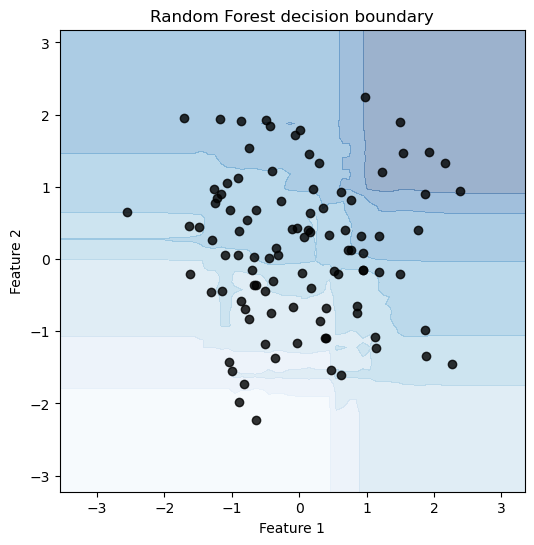

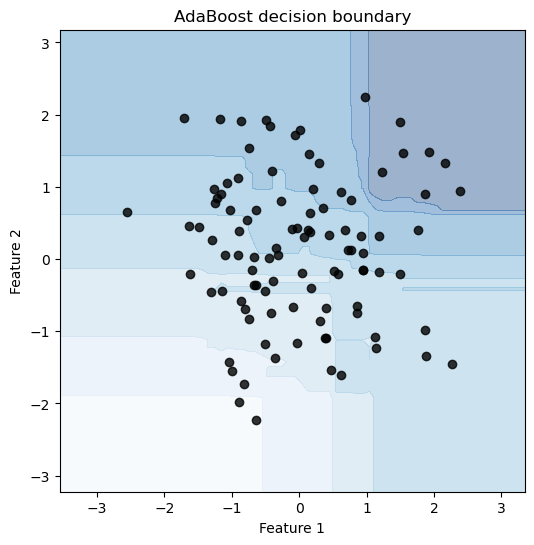

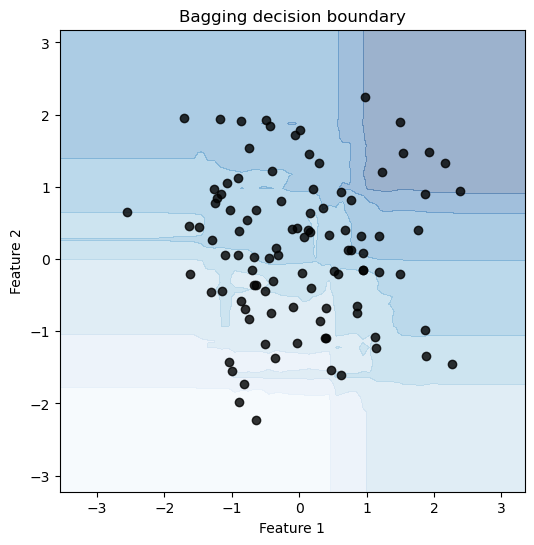

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor

# Função para plotar a superfície de decisão
def plot_decision_boundary(classifier, x_values, y_values, title):
    x_min, x_max = x_values.min() - 1, x_values.max() + 1
    y_min, y_max = y_values.min() - 1, y_values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='Blues')
    plt.scatter(x_values, y_values, alpha=0.8, c='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

# Gerando dados de exemplo
np.random.seed(0)
X = np.random.randn(100, 2)
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Treinando o modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X, y)

# Treinando o modelo AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost.fit(X, y)

# Treinando o modelo Bagging
bagging = BaggingRegressor(n_estimators=100, random_state=42)
bagging.fit(X, y)

# Plotando a superfície de decisão para o Random Forest
plt.figure(figsize=(6, 6))
plot_decision_boundary(random_forest, X[:, 0], X[:, 1], 'Random Forest decision boundary')
plt.show()

# Plotando a superfície de decisão para o AdaBoost
plt.figure(figsize=(6, 6))
plot_decision_boundary(adaboost, X[:, 0], X[:, 1], 'AdaBoost decision boundary')
plt.show()

# Plotando a superfície de decisão para o Bagging
plt.figure(figsize=(6, 6))
plot_decision_boundary(bagging, X[:, 0], X[:, 1], 'Bagging decision boundary')
plt.show()
